In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Import data

Chargement des corrdonnées du museau 

In [3]:
X_head = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/head_coords.csv",  header=None)
X_snout = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/snout_coords.csv",  header=None)

X = np.concatenate([X_head, X_snout])
lengths = [len(X_head), len(X_snout)]

X
lengths


[1375, 1375]

ValueError: x and y must have same first dimension, but have shapes (2750,) and (4,)

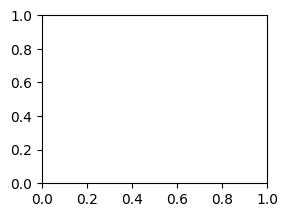

In [3]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X)) , X[0])
plt.subplot(2,2,2)
plt.plot(range(0,len(X)) ,X[1])
plt.subplot(2,2,3)
plt.plot(range(0,len(X)) ,X[2])
plt.subplot(2,2,4)
plt.plot(range(0,len(X)) ,X[3])


# Train model

In [26]:
scores = list()
models = list()
for n_components in range(2, 5): # test 2 to 5 n components
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        # covariance = tied, full, spherical
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=50)
        model.fit(X)
        models.append(model)
        scores.append(model.score(X))
        # print(f'Converged: {model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
Z = model.predict(X)


In [21]:
print(model.means_)
print(model.covars_)

[[0.2389997  0.46913121 0.4125891  0.66897887]
 [0.98739105 0.78459369 0.13142789 0.16762823]
 [0.2585683  0.48109467 0.17393147 0.22744355]
 [0.8161928  0.77778842 0.32726913 0.62124931]]
[[[ 1.79888015e-02  7.63098899e-03 -9.03381358e-03  8.45815405e-04]
  [ 7.63098899e-03  3.27599683e-02 -3.94476860e-03 -5.03235184e-03]
  [-9.03381358e-03 -3.94476860e-03  8.13108042e-03 -1.97321422e-03]
  [ 8.45815405e-04 -5.03235184e-03 -1.97321422e-03  3.32148370e-03]]

 [[ 8.67930689e-03 -1.33869780e-03  3.06686801e-04  8.75382770e-05]
  [-1.33869780e-03  2.89451243e-03  5.05456816e-06  7.01877090e-04]
  [ 3.06686801e-04  5.05456816e-06  2.53618060e-04  1.23868724e-04]
  [ 8.75382770e-05  7.01877090e-04  1.23868724e-04  5.61983573e-04]]

 [[ 2.27948047e-02  2.83797283e-03  1.11020331e-03 -9.12304765e-04]
  [ 2.83797283e-03  2.98705251e-02 -8.33791238e-04  4.30748258e-04]
  [ 1.11020331e-03 -8.33791238e-04  4.64207887e-04  3.94585178e-04]
  [-9.12304765e-04  4.30748258e-04  3.94585178e-04  1.83881

In [5]:
print(model.means_)
print(model.covars_)

[[0.2359718  0.46572582 0.41365842 0.66938191]
 [0.98821549 0.78429244 0.13145084 0.16760797]
 [0.25901044 0.48170057 0.17385921 0.22737624]
 [0.81339505 0.77914284 0.32669046 0.62123706]]
[[[0.01701674 0.         0.         0.        ]
  [0.         0.03160925 0.         0.        ]
  [0.         0.         0.00805083 0.        ]
  [0.         0.         0.         0.003318  ]]

 [[0.00836726 0.         0.         0.        ]
  [0.         0.00286438 0.         0.        ]
  [0.         0.         0.00025457 0.        ]
  [0.         0.         0.         0.00056292]]

 [[0.02290839 0.         0.         0.        ]
  [0.         0.0300972  0.         0.        ]
  [0.         0.         0.00046701 0.        ]
  [0.         0.         0.         0.00183972]]

 [[0.00370909 0.         0.         0.        ]
  [0.         0.00261036 0.         0.        ]
  [0.         0.         0.00414511 0.        ]
  [0.         0.         0.         0.00140718]]]


States:  [0 3 2 1]
[[0.17113  0.391502 0.516889 0.663207]
 [0.172891 0.411942 0.520052 0.637912]
 [0.174267 0.428778 0.5226   0.617213]
 ...
 [0.227563 0.707101 0.129164 0.165155]
 [0.23472  0.700602 0.113701 0.153982]
 [0.246215 0.695273 0.095645 0.140863]]
[0.17113  0.172891 0.174267 ... 0.227563 0.23472  0.246215]


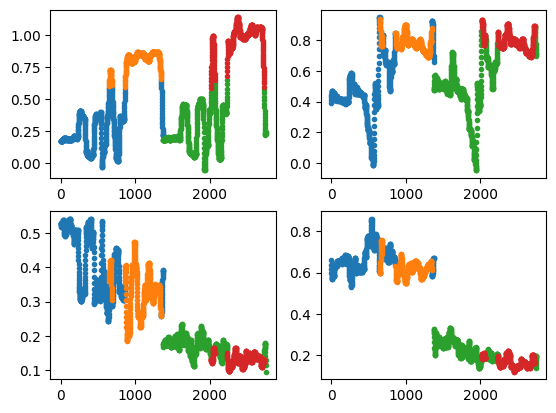

In [62]:
states= pd.unique(Z)
print("States: ",states)
print(X)
print(X[0:,0])

plt.subplot(2,2,1)
for i in states:
    #print(len(X[0:,0]))
    x = np.linspace(1,2750,2750)[(Z == i)]
    y = X[0:,0][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,2)
for i in states:
    #print(len(X[1:,0]))
    x = np.linspace(1,2750,2750)[(Z == i)]
    y = X[0:,1][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,3)
for i in states:
    x = np.linspace(1,2750,2750)[(Z == i)]
    y = X[0:,2][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,4)
for i in states:
    x = np.linspace(1,2750,2750)[(Z == i)]
    y = X[0:,3][(Z == i)]
    plt.plot(x, y, '.')


In [ ]:
#df=pd.DataFrame({'states':Z})
# make the same thing for the others 
#df.to_csv("E:/UQAM/Recherche/Thomas/data/head_snout_coords_hmmstates.csv")